In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv(r'/content/drive/MyDrive/Dataset/Uber Request Data.csv')

In [6]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [9]:
df.shape

(6745, 6)

# 1. Data Preprocessing and cleaning

In [10]:
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


In [11]:
 df.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [12]:
df1=df.copy()

In [13]:
df1.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [14]:
# Splitting date and time for 'Request timestamp' and 'Drop timestamp'
df[['Request Date', 'Request Time']] = df['Request timestamp'].str.split(' ', expand=True)
df[['Drop Date', 'Drop Time']] = df['Drop timestamp'].str.split(' ', expand=True)

# Dropping original timestamp columns
df.drop(['Request timestamp', 'Drop timestamp'], axis=1, inplace=True)

In [15]:
df

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,11/7/2016,13:00
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,11/7/2016,18:47
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,12/7/2016,22:03
4,3112,City,1.0,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016,23:49:03,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016,23:50:05,NaN,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016,23:52:06,NaN,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016,23:54:39,NaN,NaN


In [16]:
df['Request Date'].unique()

array(['11/7/2016', '12/7/2016', '13-07-2016', '14-07-2016', '15-07-2016'],
      dtype=object)

In [17]:
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request Date,object
Request Time,object
Drop Date,object
Drop Time,object


In [18]:
df1

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [20]:
df1['Request timestamp'] = pd.to_datetime(df1['Request timestamp'], errors='coerce', dayfirst=True)
df1['Drop timestamp'] = pd.to_datetime(df1['Drop timestamp'], errors='coerce', dayfirst=True)

In [23]:
df1.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,datetime64[ns]
Drop timestamp,datetime64[ns]


In [24]:
df1.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,4071
Drop timestamp,5595


In [25]:
df1.shape

(6745, 6)

In [26]:
df2=df1.copy()

In [ ]:
df2.isnull().sum()

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [33]:
df2['Drop timestamp'] = df2['Drop timestamp'].fillna(0)

In [34]:
df2.isnull().sum()

,0
Request id,0
Pickup point,0
Status,0
Request timestamp,4071
Drop timestamp,0


In [35]:
df2

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,Trip Completed,NaT,0
...,...,...,...,...,...
6740,6745,City,No Cars Available,NaT,0
6741,6752,Airport,No Cars Available,NaT,0
6742,6751,City,No Cars Available,NaT,0
6743,6754,City,No Cars Available,NaT,0


In [ ]:
# requests per time
#seperating  time and date


In [36]:
df2['date'] = df2['Request timestamp'].dt.date
df2['time'] = df2['Request timestamp'].dt.time

In [37]:
df2

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,date,time
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,Trip Completed,NaT,0,NaT,NaT
...,...,...,...,...,...,...,...
6740,6745,City,No Cars Available,NaT,0,NaT,NaT
6741,6752,Airport,No Cars Available,NaT,0,NaT,NaT
6742,6751,City,No Cars Available,NaT,0,NaT,NaT
6743,6754,City,No Cars Available,NaT,0,NaT,NaT


In [38]:
# show duplicate rows in a column
df2['Request id'].duplicated().sum()

np.int64(0)

In [39]:
df2['Request id'].unique


<bound method Series.unique of 0        619
1        867
2       1807
3       2532
4       3112
        ... 
6740    6745
6741    6752
6742    6751
6743    6754
6744    6753
Name: Request id, Length: 6745, dtype: int64>

# 2. EDA

In [40]:
df2['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [41]:
df2['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

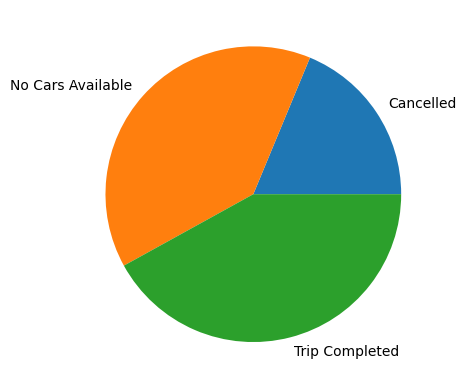

In [42]:
# bar chart of df['Status]
ax=df2.groupby('Status').size().plot(kind='pie')
#ax.set_yticklabels(['{:.2f}%'.format(100 * x / df2.shape[0]) for x in df2.groupby('Status').size()])
#ax.set_yticklabels(['{:.2f}%'.format(100 * x / df2.shape[0]) for x in df2.groupby('Status').size()])
plt.show()

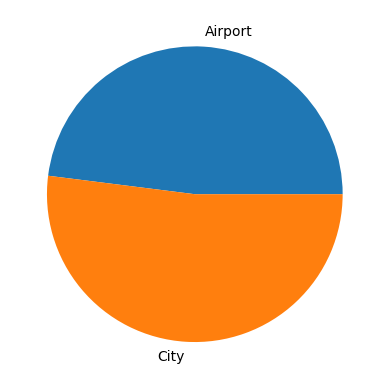

In [43]:
# pie chart of pickup point

ax=df2.groupby('Pickup point').size().plot(kind='pie')

In [44]:
df2['time_bin'] = df2['Request timestamp'].dt.floor('2H')  # Grouping into 2-hour bins

/tmp/ipython-input-44-709624924.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2['time_bin'] = df2['Request timestamp'].dt.floor('2H')  # Grouping into 2-hour bins


In [45]:
df2.dtypes

,0
Request id,int64
Pickup point,object
Status,object
Request timestamp,datetime64[ns]
Drop timestamp,object
date,object
time,object
time_bin,datetime64[ns]


In [46]:
df2['Drop timestamp'] = pd.to_datetime(df2['Drop timestamp'], errors='coerce')

In [47]:
df2.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,date,time,time_bin
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11 10:00:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11 16:00:00
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12 08:00:00
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12 20:00:00
4,3112,City,Trip Completed,NaT,1970-01-01 00:00:00,NaT,NaT,NaT


In [48]:
# Calculating the time difference in minutes
df2['Time Difference'] = ((df2['Drop timestamp'] - df2['Request timestamp']).dt.total_seconds()) / 60


In [49]:
df2

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,date,time,time_bin,Time Difference
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11 10:00:00,69.0
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11 16:00:00,50.0
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12 08:00:00,41.0
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12 20:00:00,55.0
4,3112,City,Trip Completed,NaT,1970-01-01 00:00:00,NaT,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...
6740,6745,City,No Cars Available,NaT,1970-01-01 00:00:00,NaT,NaT,NaT,NaN
6741,6752,Airport,No Cars Available,NaT,1970-01-01 00:00:00,NaT,NaT,NaT,NaN
6742,6751,City,No Cars Available,NaT,1970-01-01 00:00:00,NaT,NaT,NaT,NaN
6743,6754,City,No Cars Available,NaT,1970-01-01 00:00:00,NaT,NaT,NaT,NaN


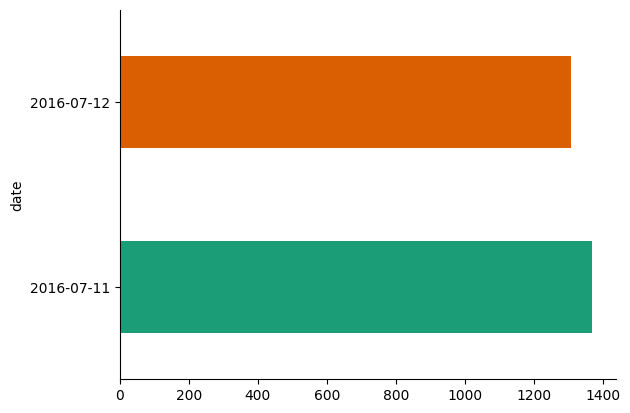

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

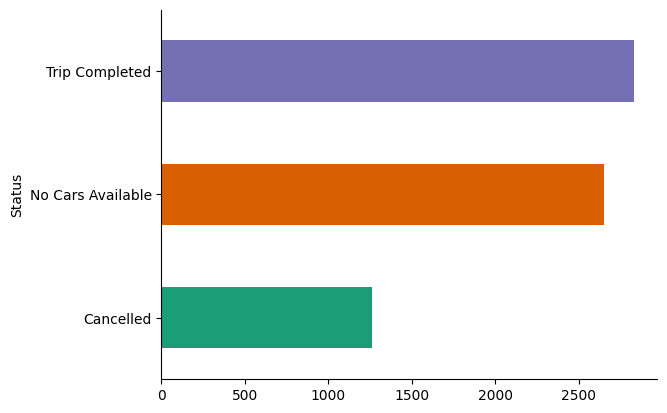

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

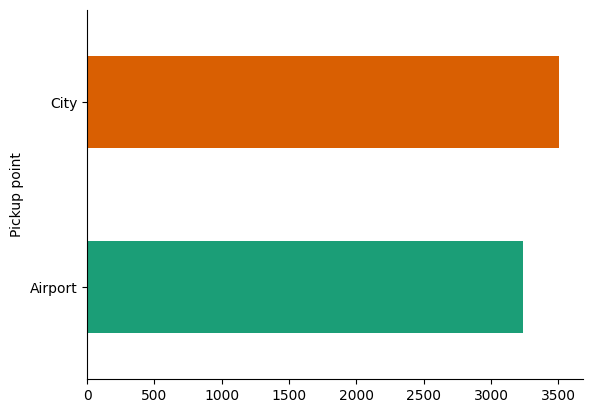

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Pickup point').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

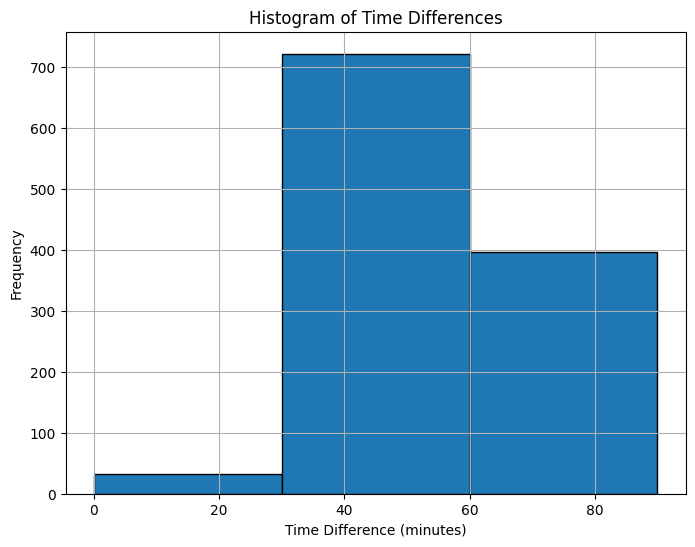

In [55]:
# graph of commuting time
# Dropping rows with null values in 'Time Difference'
df2_cleaned = df2.dropna(subset=['Time Difference'])
df2_cleaned = df2_cleaned[df2_cleaned['Time Difference'] != 0]

# Convert 'Time Difference' into 30-minute bins
bins = range(0, int(df2_cleaned['Time Difference'].max()) + 30, 30)

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(df2_cleaned['Time Difference'], bins=bins, edgecolor='black')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.grid(True)
plt.show()

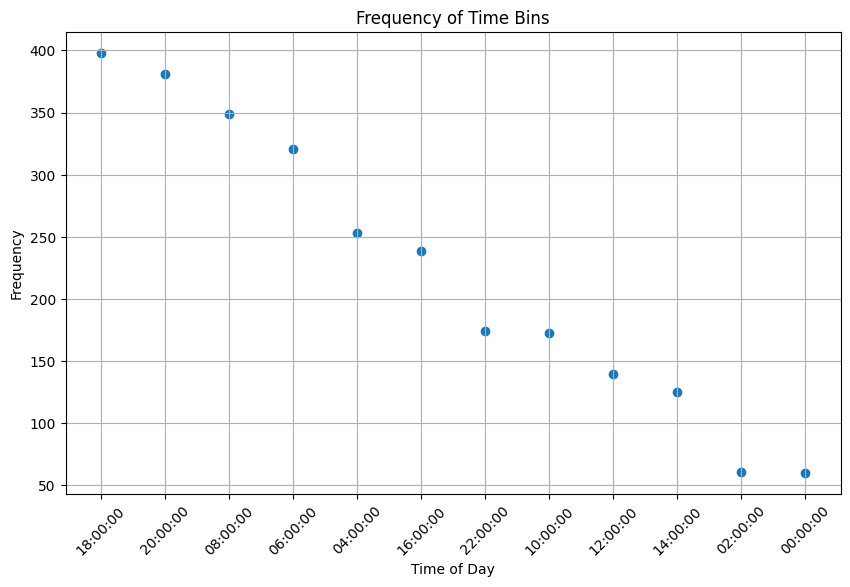

In [56]:
df2['time_bin'] = pd.to_datetime(df2['time_bin'])

# Calculate frequency of time bins
time_bin_frequency = df2['time_bin'].dt.time.value_counts()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter([str(time) for time in time_bin_frequency.index], time_bin_frequency.values)
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Frequency of Time Bins')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

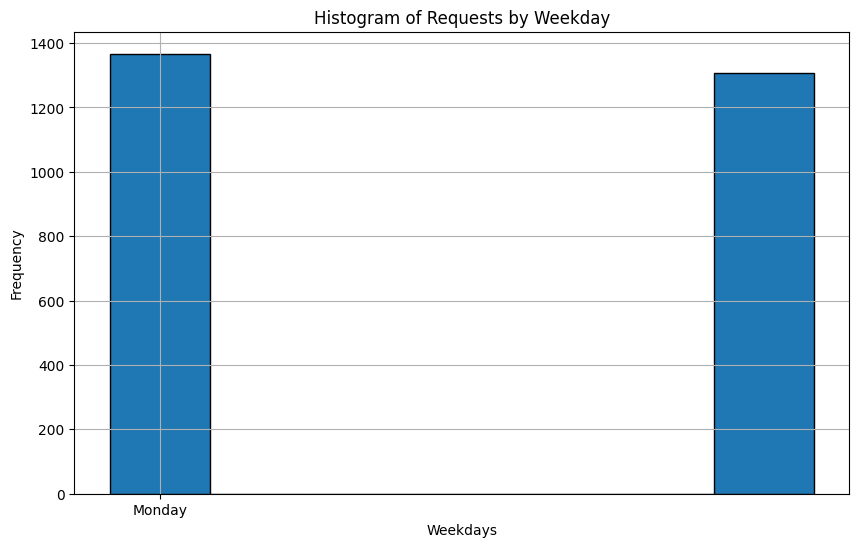

In [57]:
# Extracting weekdays from 'Request timestamp' column
weekdays = df2_cleaned['Request timestamp'].dt.day_name()

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(weekdays, bins=7, edgecolor='black', align='left')
plt.xlabel('Weekdays')
plt.ylabel('Frequency')
plt.title('Histogram of Requests by Weekday')
plt.grid(True)
plt.show()

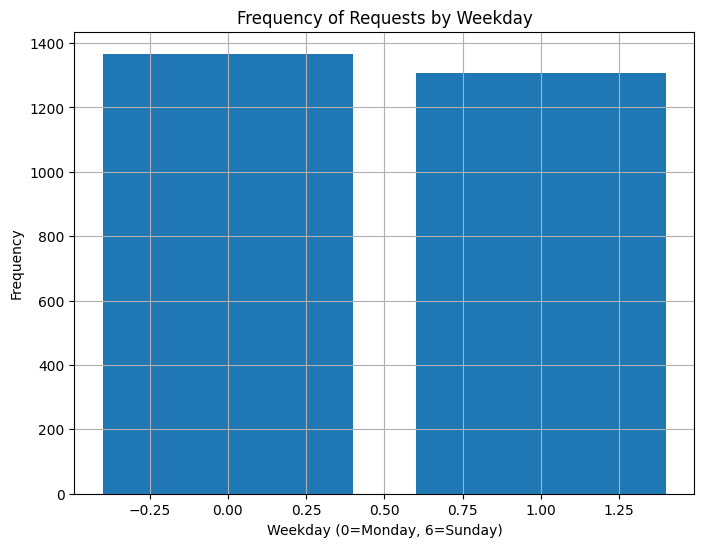

In [58]:
# Calculate frequency of weekdays in 'Request timestamp'
weekdays_frequency = df2['Request timestamp'].dt.dayofweek.value_counts()

# Scatter plot for weekdays
plt.figure(figsize=(8, 6))
plt.bar(weekdays_frequency.index, weekdays_frequency.values)
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Frequency')
plt.title('Frequency of Requests by Weekday')
plt.grid(True)
plt.show()

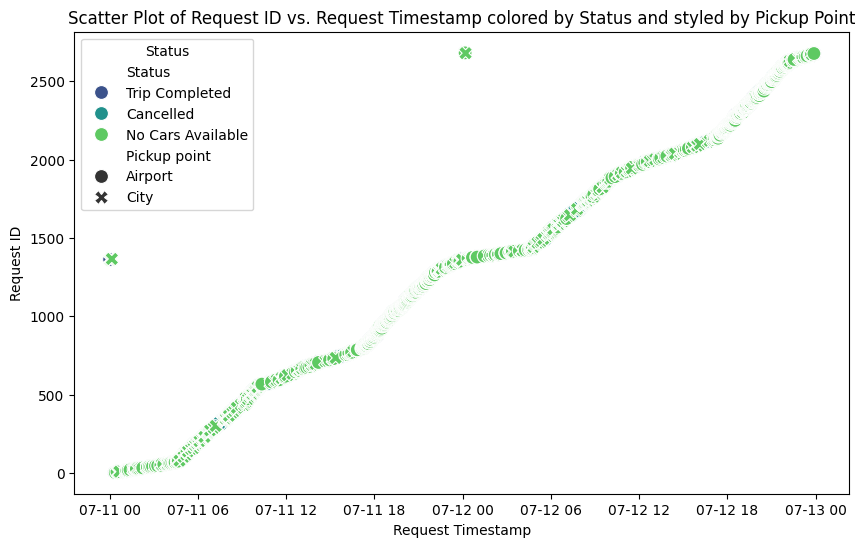

In [60]:
# Create a scatter plot with different colors for each data item
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df2, x='Request timestamp', y='Request id', hue='Status', style='Pickup point', palette='viridis', s=100)
plt.xlabel('Request Timestamp')
plt.ylabel('Request ID')
plt.title('Scatter Plot of Request ID vs. Request Timestamp colored by Status and styled by Pickup Point')
# Fix for AttributeError: 'Axes' object has no attribute 'legend_elements'
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Status')
plt.show()

In [61]:
df2.columns

Index(['Request id', 'Pickup point', 'Status', 'Request timestamp',
       'Drop timestamp', 'date', 'time', 'time_bin', 'Time Difference'],
      dtype='object')

In [62]:
df2['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [63]:
df2['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [64]:
df2['Request timestamp'].unique()

<DatetimeArray>
['2016-07-11 11:51:00', '2016-07-11 17:57:00', '2016-07-12 09:17:00',
 '2016-07-12 21:08:00',                 'NaT', '2016-07-11 06:46:00',
 '2016-07-12 05:08:00', '2016-07-12 12:30:00', '2016-07-11 10:00:00',
 '2016-07-11 18:45:00',
 ...
 '2016-07-12 22:32:00', '2016-07-12 22:59:00', '2016-07-12 23:04:00',
 '2016-07-12 23:07:00', '2016-07-12 23:08:00', '2016-07-12 23:17:00',
 '2016-07-12 23:25:00', '2016-07-12 23:37:00', '2016-07-12 23:39:00',
 '2016-07-12 23:45:00']
Length: 1595, dtype: datetime64[ns]

In [65]:
df2.shape

(6745, 9)

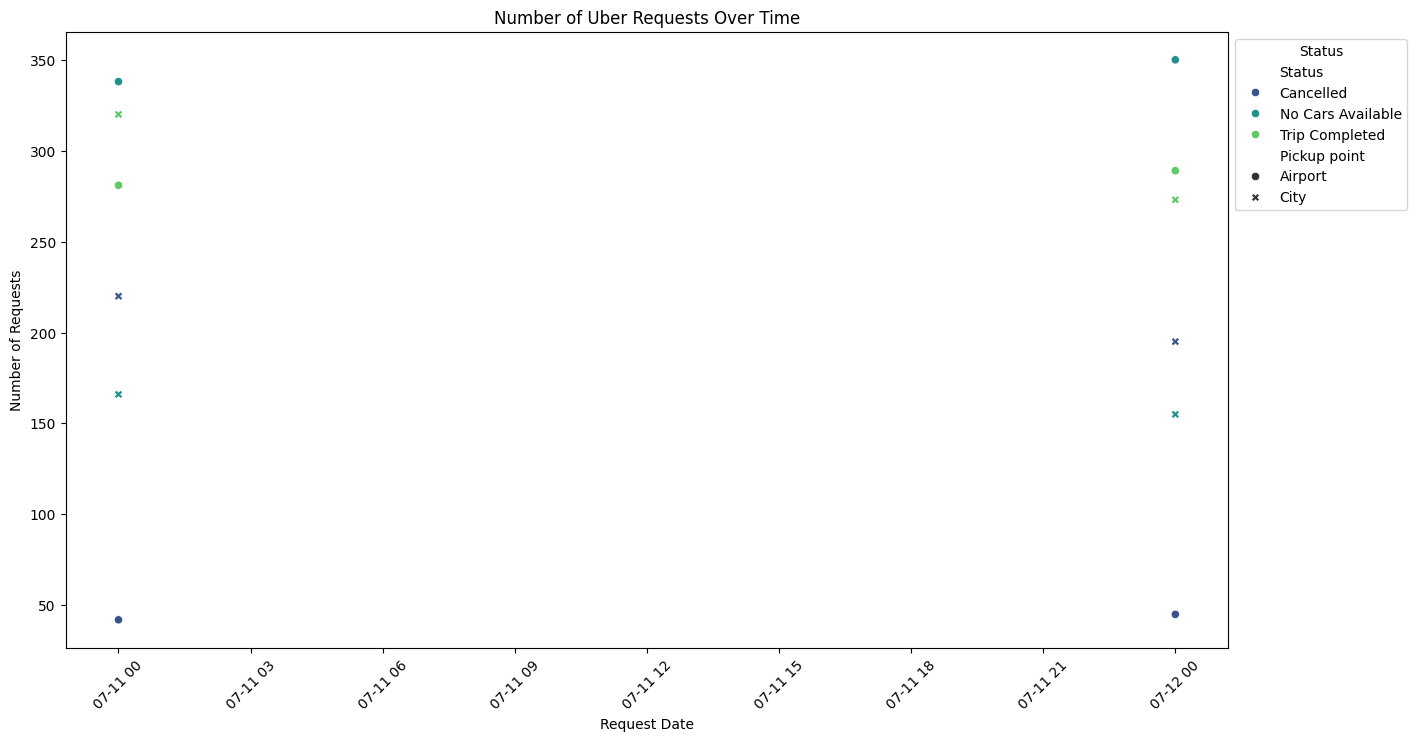

In [66]:
# Convert 'Request timestamp' column to datetime
df2['Request timestamp'] = pd.to_datetime(df2['Request timestamp'])

# Extract date from 'Request timestamp' to group by date
df2['Date'] = df2['Request timestamp'].dt.date

# Count the number of requests for each date, status, and pickup point
requests_count = df2.groupby(['Date', 'Status', 'Pickup point']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(15, 8))
sns.scatterplot(data=requests_count, x='Date', y='Count', hue='Status', style='Pickup point', palette='viridis', markers=True)
plt.xlabel('Request Date')
plt.ylabel('Number of Requests')
plt.title('Number of Uber Requests Over Time')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipython-input-67-2077150473.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df2['Date'] = df2['Request timestamp'].dt.floor('T')  # Floor to minute-level precision


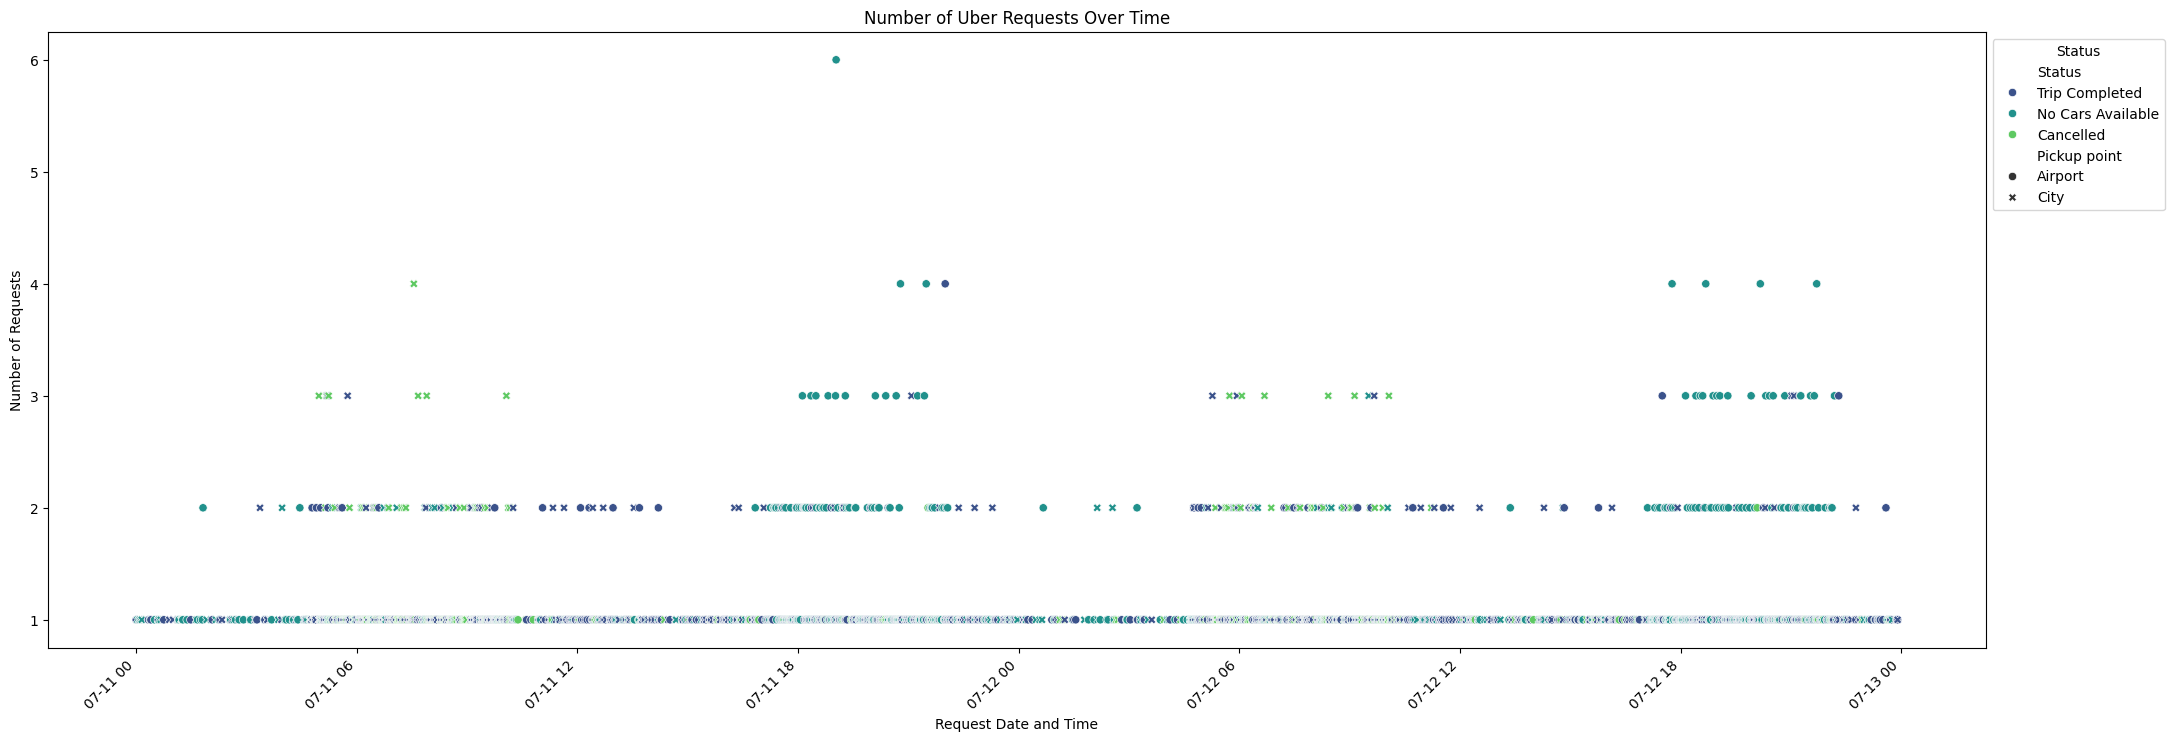

In [67]:
# Extract date and time from 'Request timestamp'
df2['Date'] = df2['Request timestamp'].dt.floor('T')  # Floor to minute-level precision

# Count the number of requests for each date and time
requests_count = df2.groupby(['Date', 'Status', 'Pickup point']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(25, 8))
sns.scatterplot(data=requests_count, x='Date', y='Count', hue='Status', style='Pickup point', palette='viridis', markers=True)
plt.xlabel('Request Date and Time')
plt.ylabel('Number of Requests')
plt.title('Number of Uber Requests Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipython-input-68-4154250726.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2['Date'] = df2['Request timestamp'].dt.floor('H')
/tmp/ipython-input-68-4154250726.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=requests_count, x='Date', y='Count', palette='viridis')


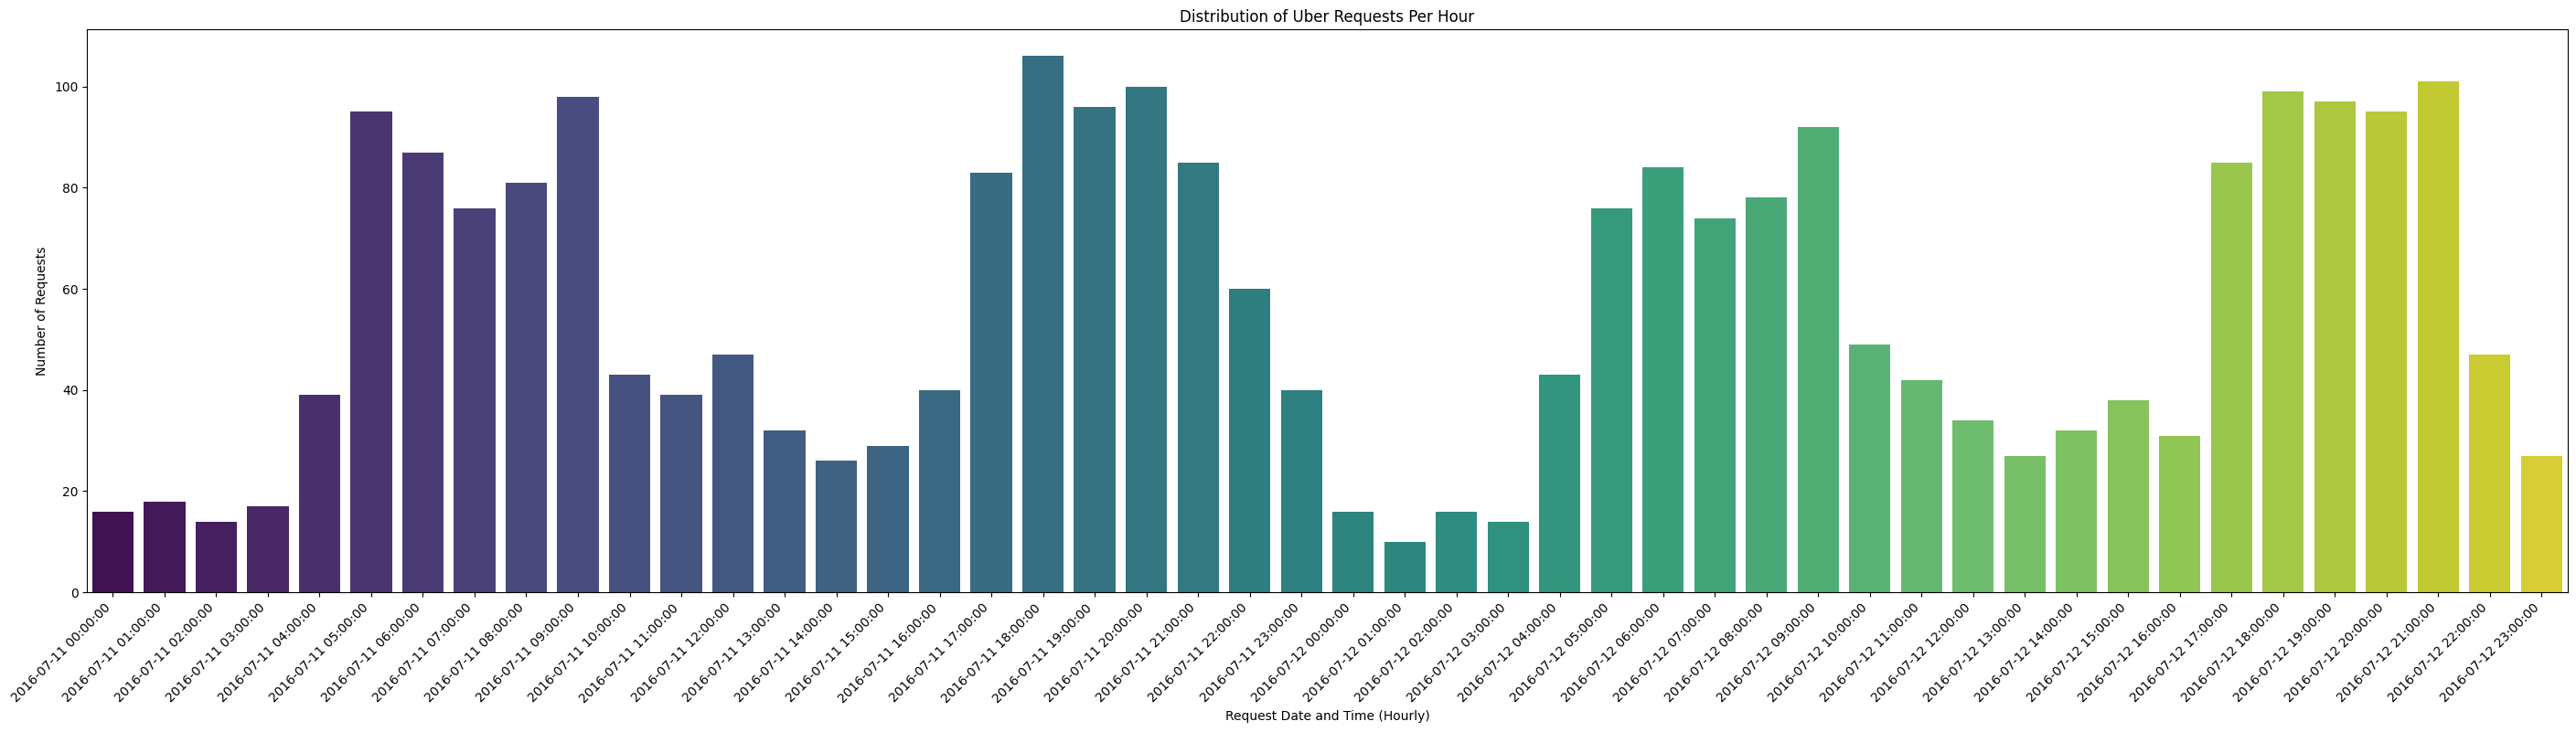

In [68]:
# Extract date and time from 'Request timestamp' and floor to hour-level precision
df2['Date'] = df2['Request timestamp'].dt.floor('H')

# Count the number of requests for each date and time
requests_count = df2.groupby(['Date']).size().reset_index(name='Count')

# Plot the bar graph
plt.figure(figsize=(35, 8))
sns.barplot(data=requests_count, x='Date', y='Count', palette='viridis')
plt.xlabel('Request Date and Time (Hourly)')
plt.ylabel('Number of Requests')
plt.title('Distribution of Uber Requests Per Hour')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

/tmp/ipython-input-69-2500315122.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2['Date'] = df2['Request timestamp'].dt.floor('3H')
/tmp/ipython-input-69-2500315122.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=requests_count, x='Date', y='Count', palette='viridis')


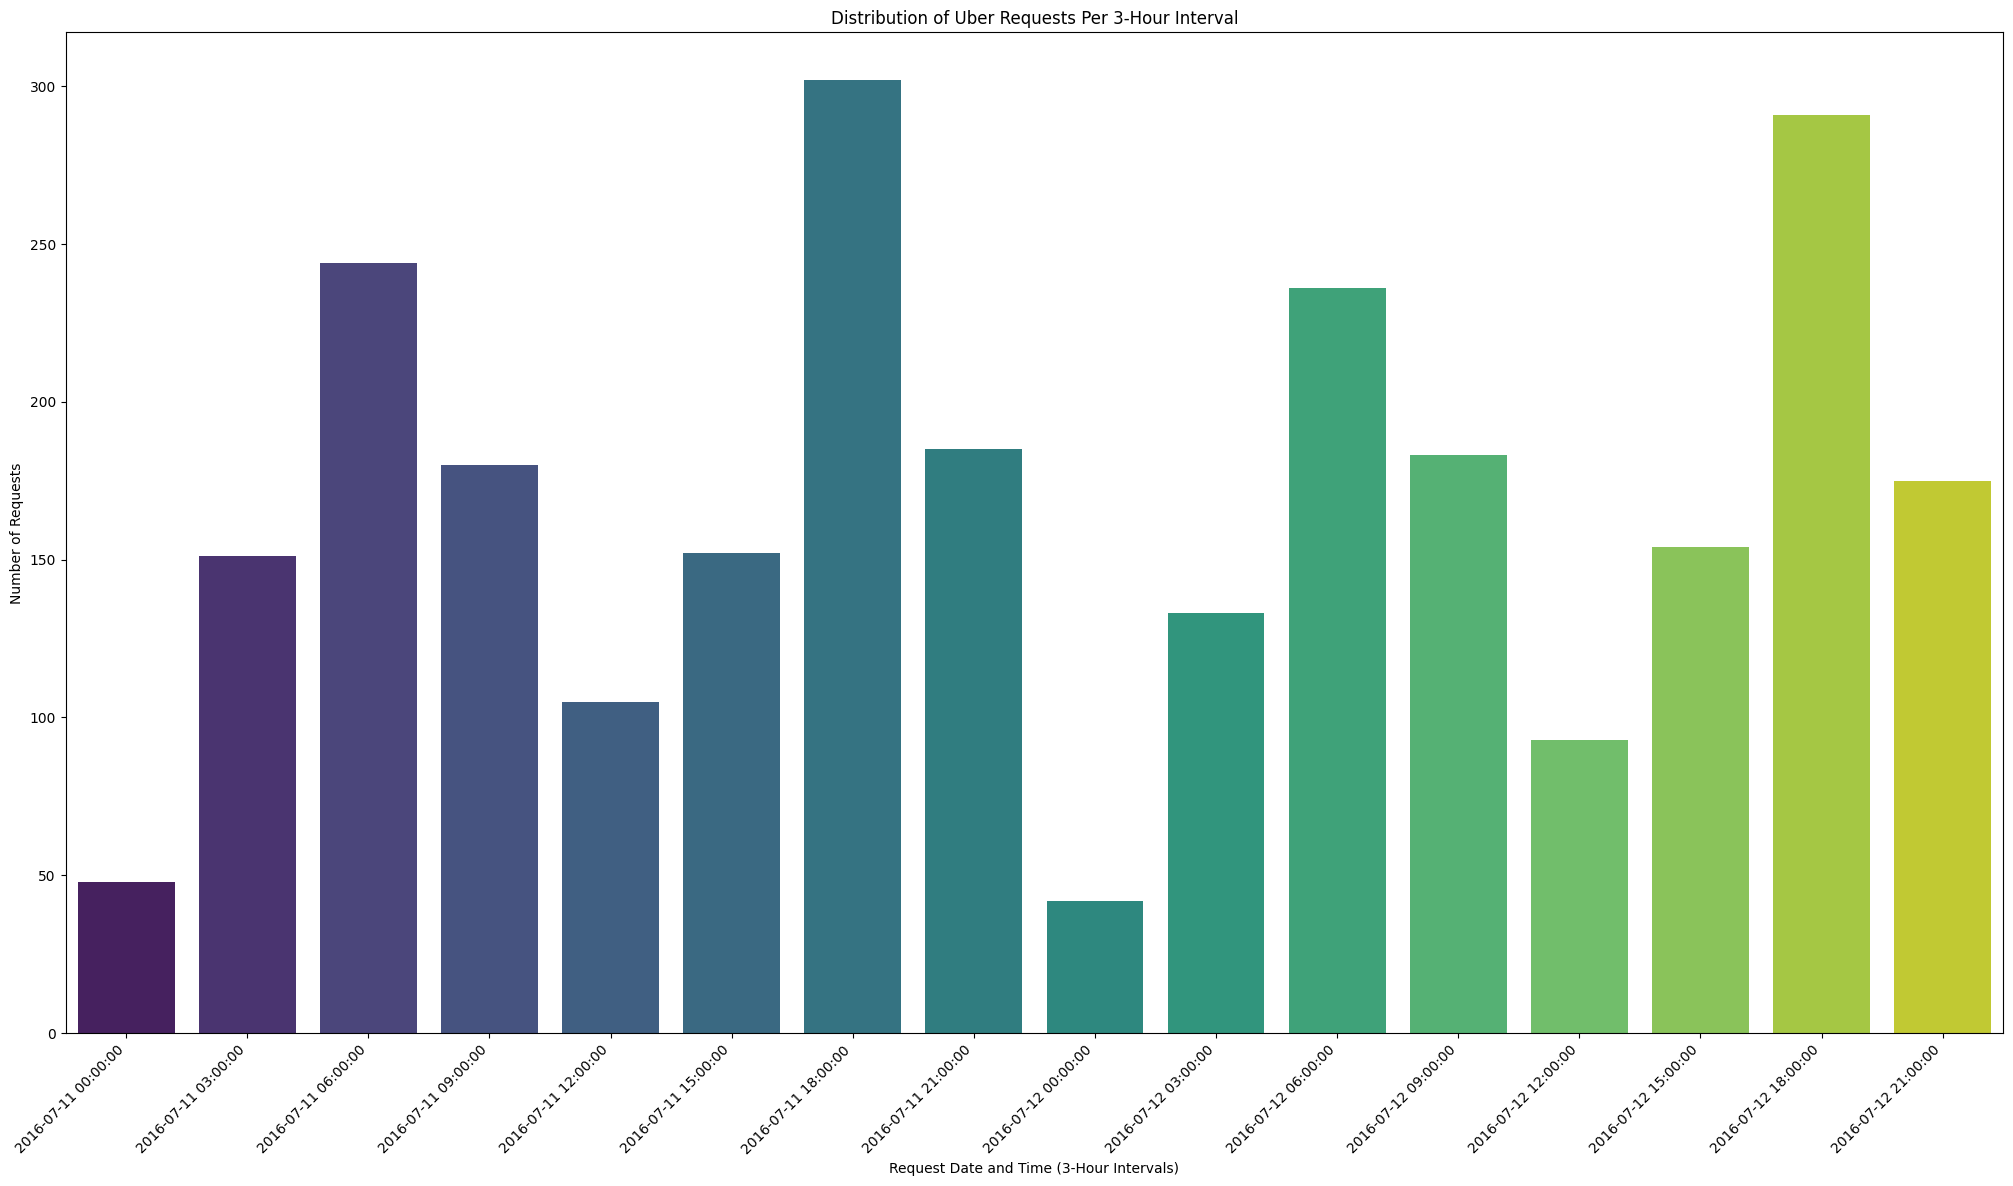

In [69]:
# Convert 'Request timestamp' column to datetime
df2['Request timestamp'] = pd.to_datetime(df2['Request timestamp'])

# Extract date and time from 'Request timestamp' and floor to 3-hour-level precision
df2['Date'] = df2['Request timestamp'].dt.floor('3H')

# Count the number of requests for each date and time
requests_count = df2.groupby(['Date']).size().reset_index(name='Count')

# Plot the bar graph
plt.figure(figsize=(25, 13))
sns.barplot(data=requests_count, x='Date', y='Count', palette='viridis')
plt.xlabel('Request Date and Time (3-Hour Intervals)')
plt.ylabel('Number of Requests')
plt.title('Distribution of Uber Requests Per 3-Hour Interval')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

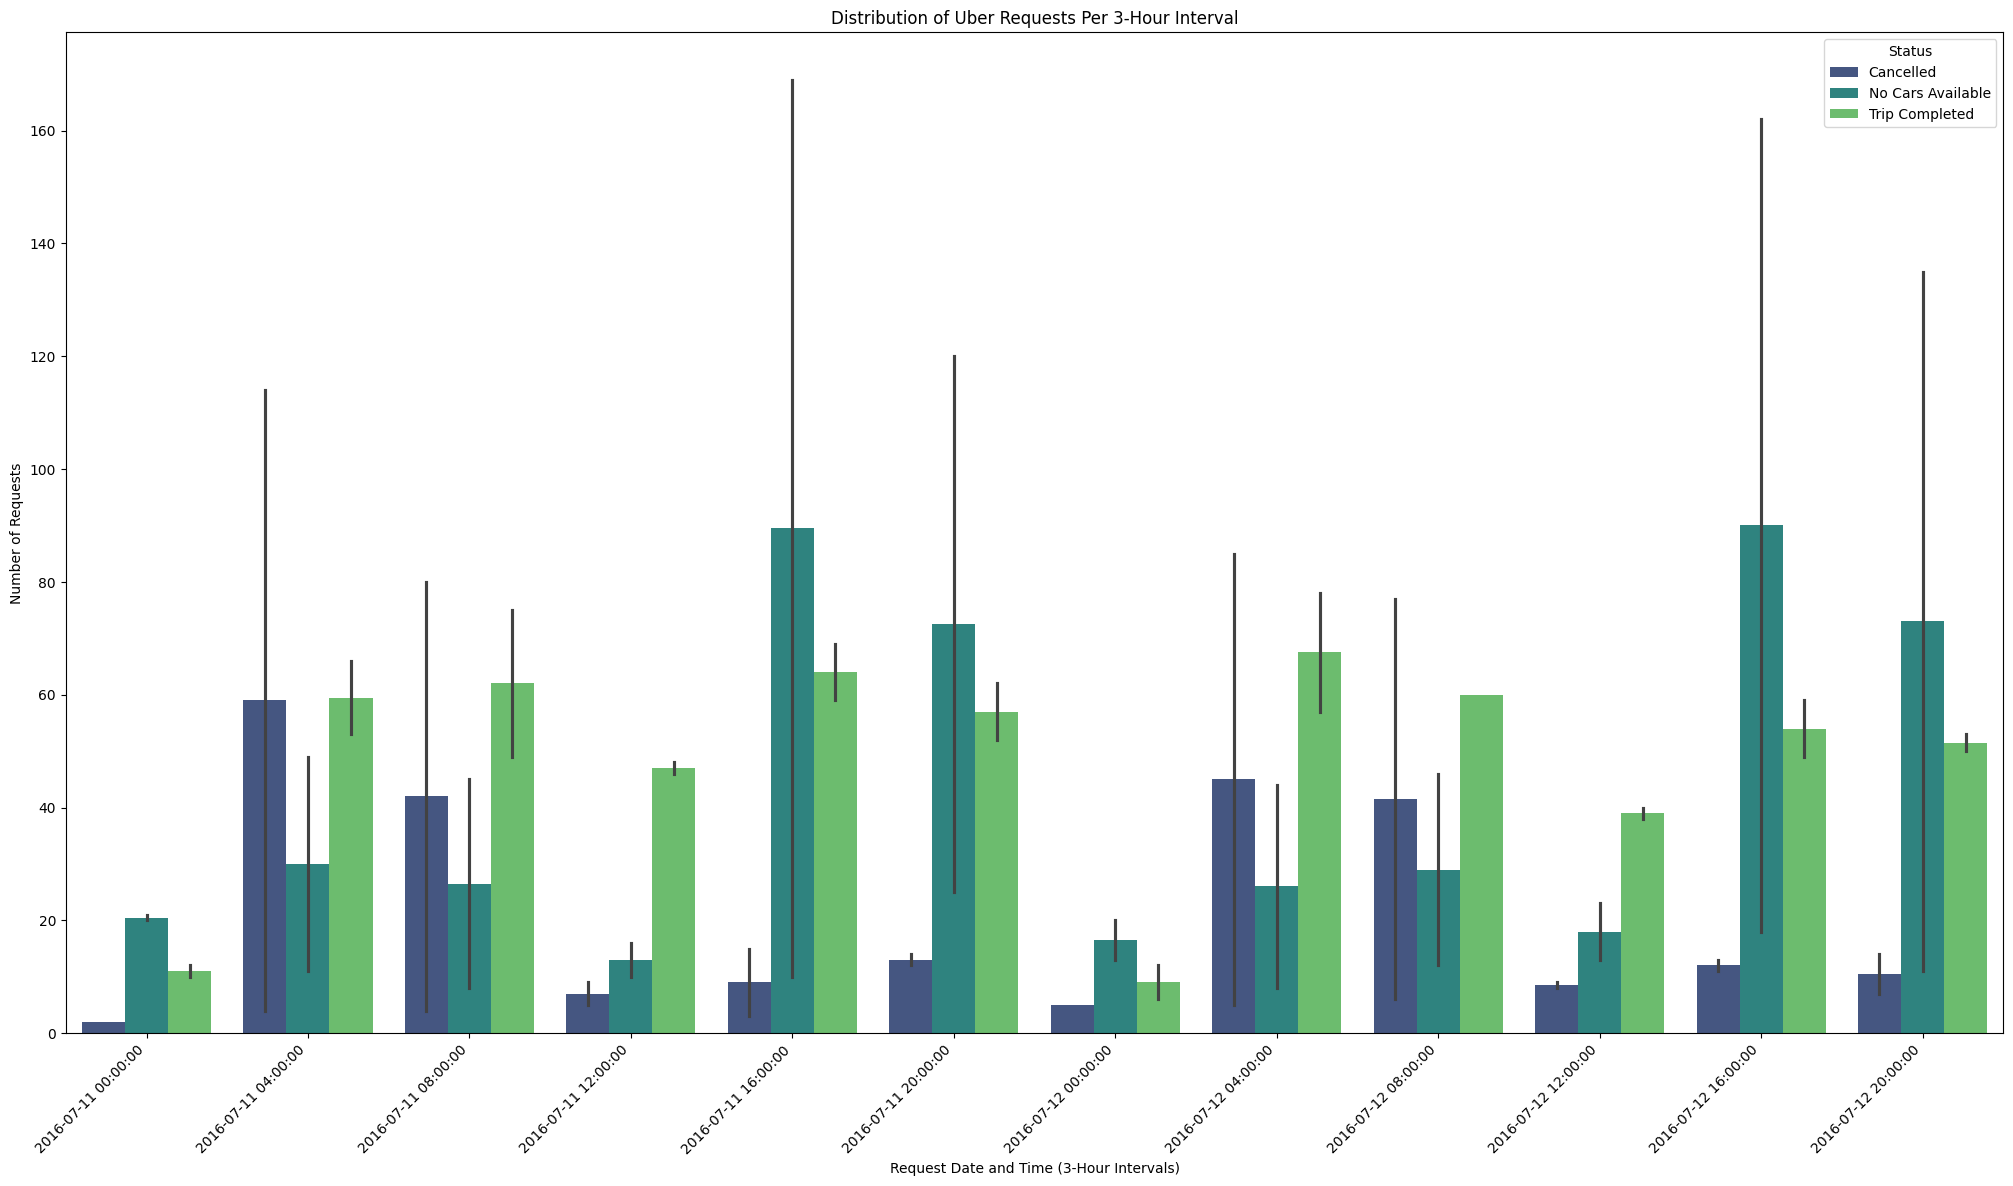

In [70]:
# Extract date and time from 'Request timestamp' and floor to 3-hour-level precision
df2['Date'] = df2['Request timestamp'].dt.floor('4H')

# Count the number of requests for each date and time, status, and pickup point
requests_count = df2.groupby(['Date', 'Status', 'Pickup point']).size().reset_index(name='Count')

# Plot the bar graph with hue encoding for Status and Pickup point
plt.figure(figsize=(25, 13))
sns.barplot(data=requests_count, x='Date', y='Count', hue='Status', palette='viridis', dodge=True)
plt.xlabel('Request Date and Time (3-Hour Intervals)')
plt.ylabel('Number of Requests')
plt.title('Distribution of Uber Requests Per 3-Hour Interval')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Status', bbox_to_anchor=(1, 1))
plt.show()

In [71]:
print(df2.columns)

Index(['Request id', 'Pickup point', 'Status', 'Request timestamp',
       'Drop timestamp', 'date', 'time', 'time_bin', 'Time Difference',
       'Date'],
      dtype='object')
